# Algoritmo Fuzzy C Means

## Índice

- [Link para retornar ao notebook principal](#retornar-para-notebook-principal---mainipynb)
- [Importando bibliotecas e pacotes](#importando-bibliotecas-e-pacotes)
- [Importando datasets](#importando-datasets)
- [Testes com o algoritmo](#testes-com-o-algoritmo)
- [Aplicando o algoritmo Fuzzy C Means](#implementação-do-algoritmo)

## Retornar para notebook principal - main.ipynb

[Link para notebook principal](./main.ipynb)

## Importando bibliotecas e pacotes

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.model_selection import train_test_split
from utils.parametros import ParametrosCmeans
from matplotlib import pyplot as plt
from fcmeans import FCM
import seaborn as sns
import pandas as pd
import numpy as np

## Importando datasets

In [2]:
df_funcao_renal = pd.read_csv("../databases/raw/InputFuncaoRenal.csv", sep = ",", index_col = "subject_id")
df_dieta_grupos = pd.read_csv("../databases/raw/dva_dieta_grupos.csv", sep = ",", index_col = "subject_id")
df_perfil_hepatico = pd.read_csv("../databases/raw/InputPerfilHepatico.csv", sep = ",", index_col = "subject_id")

## Testes com o Algoritmo

### DATASET Funcao Renal

In [3]:
lista_qtd_clusters = [i for i in range(2, 14)]

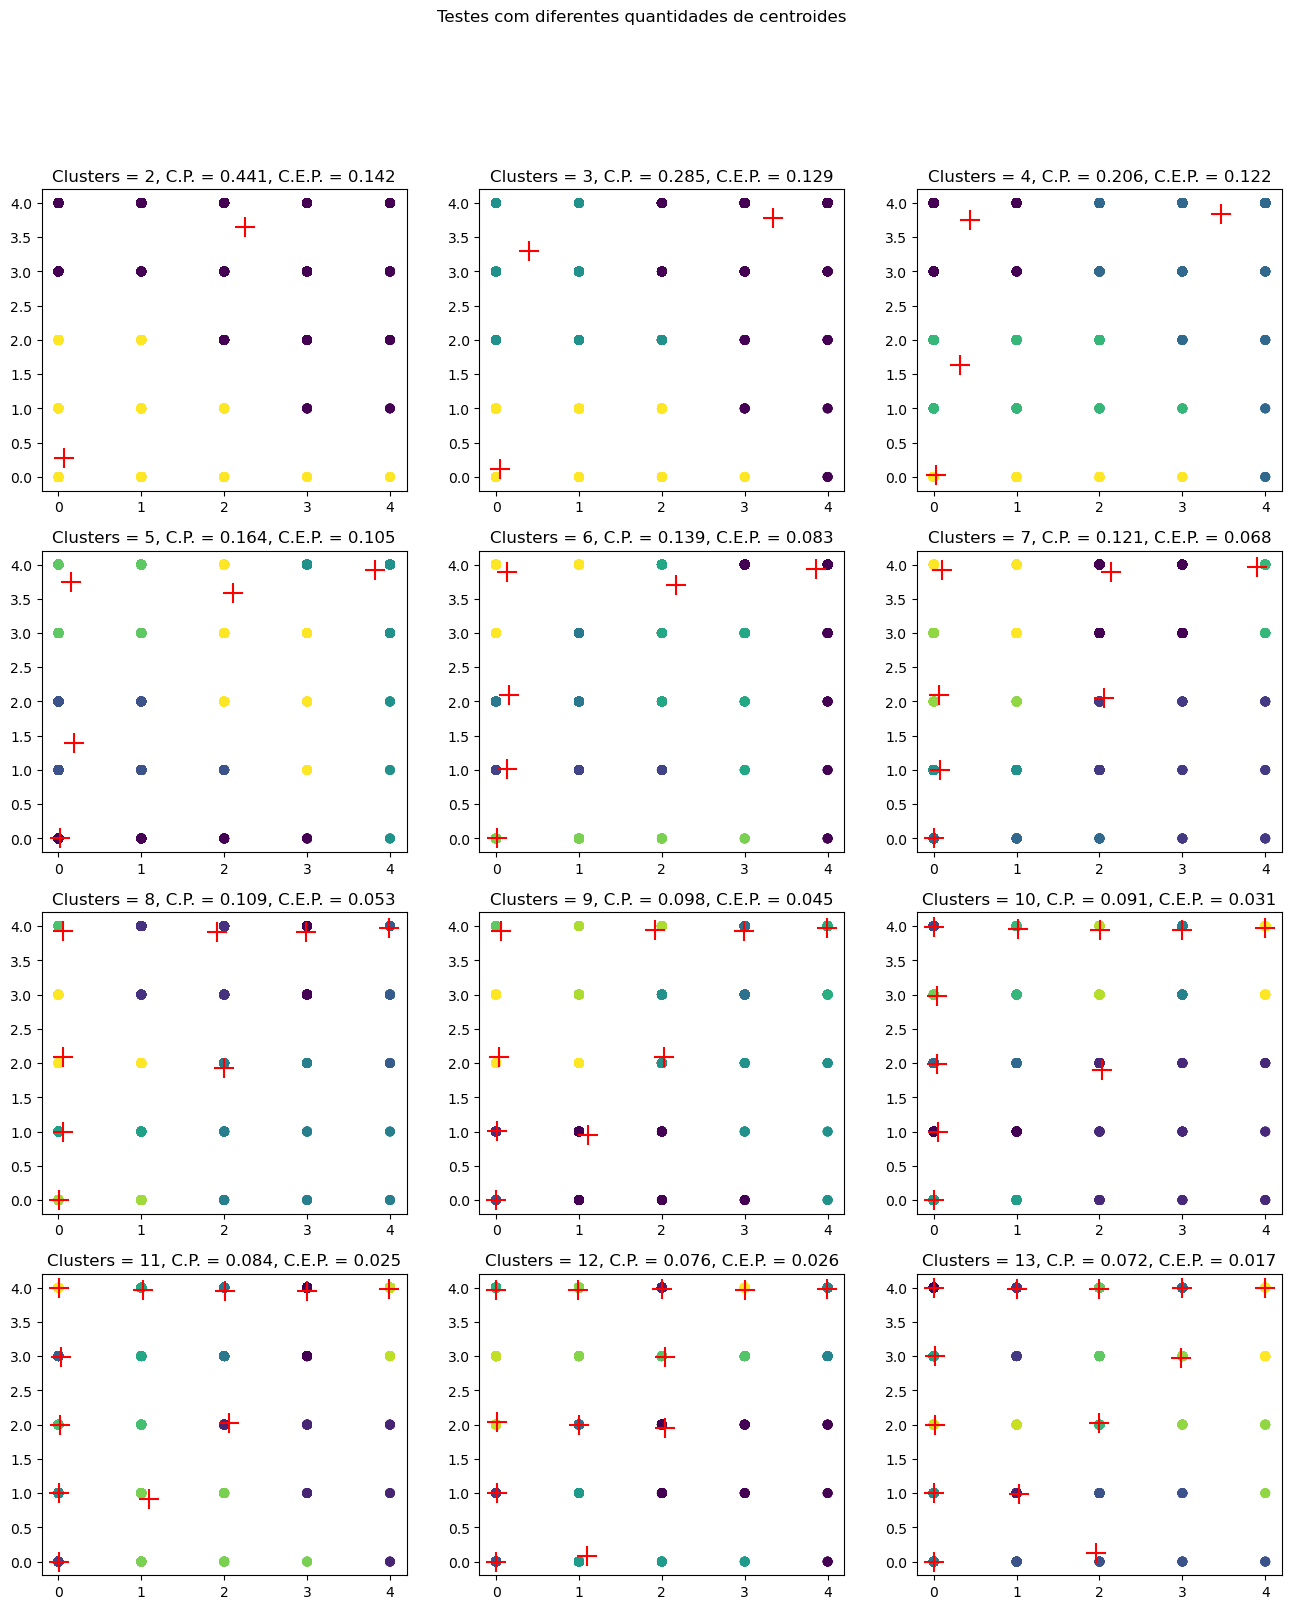

In [4]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "euclidean",
                  m = 2.0)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.441 e C.E.P. = 0.142.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:172: RuntimeWarning: invalid value encountered in divide
  return np.dot(A, B.T) / (p1*p2)


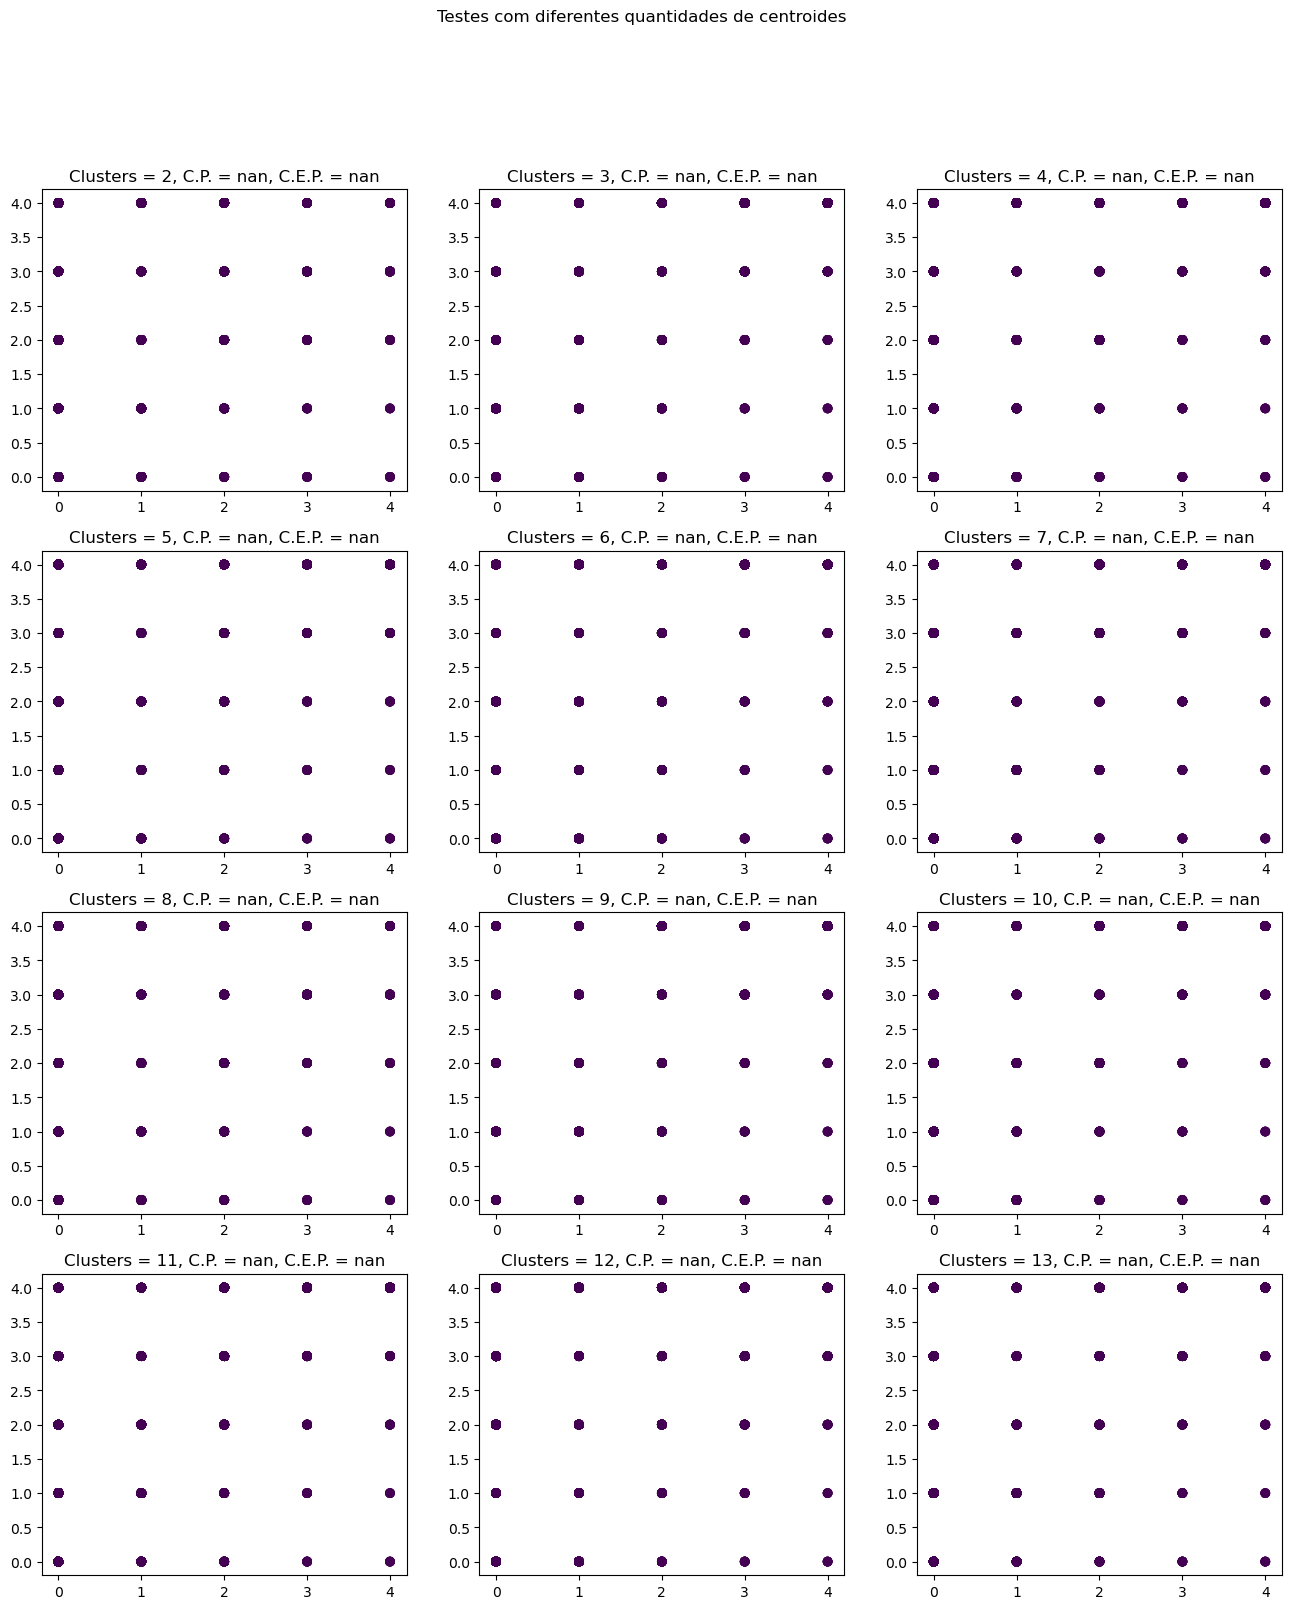

In [5]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "cosine",
                  m = 2.0)
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima ocorre erro de divisão logo no começo das iterações. Isso não permite que nenhum gráfico seja impresso.

/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: divide by zero encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)
/home/igorsantana/anaconda3/envs/.petca-venv/lib/python3.12/site-packages/fcmeans/main.py:102: RuntimeWarning: invalid value encountered in divide
  lambda data, col: (data[:, col] / data.T).sum(0)


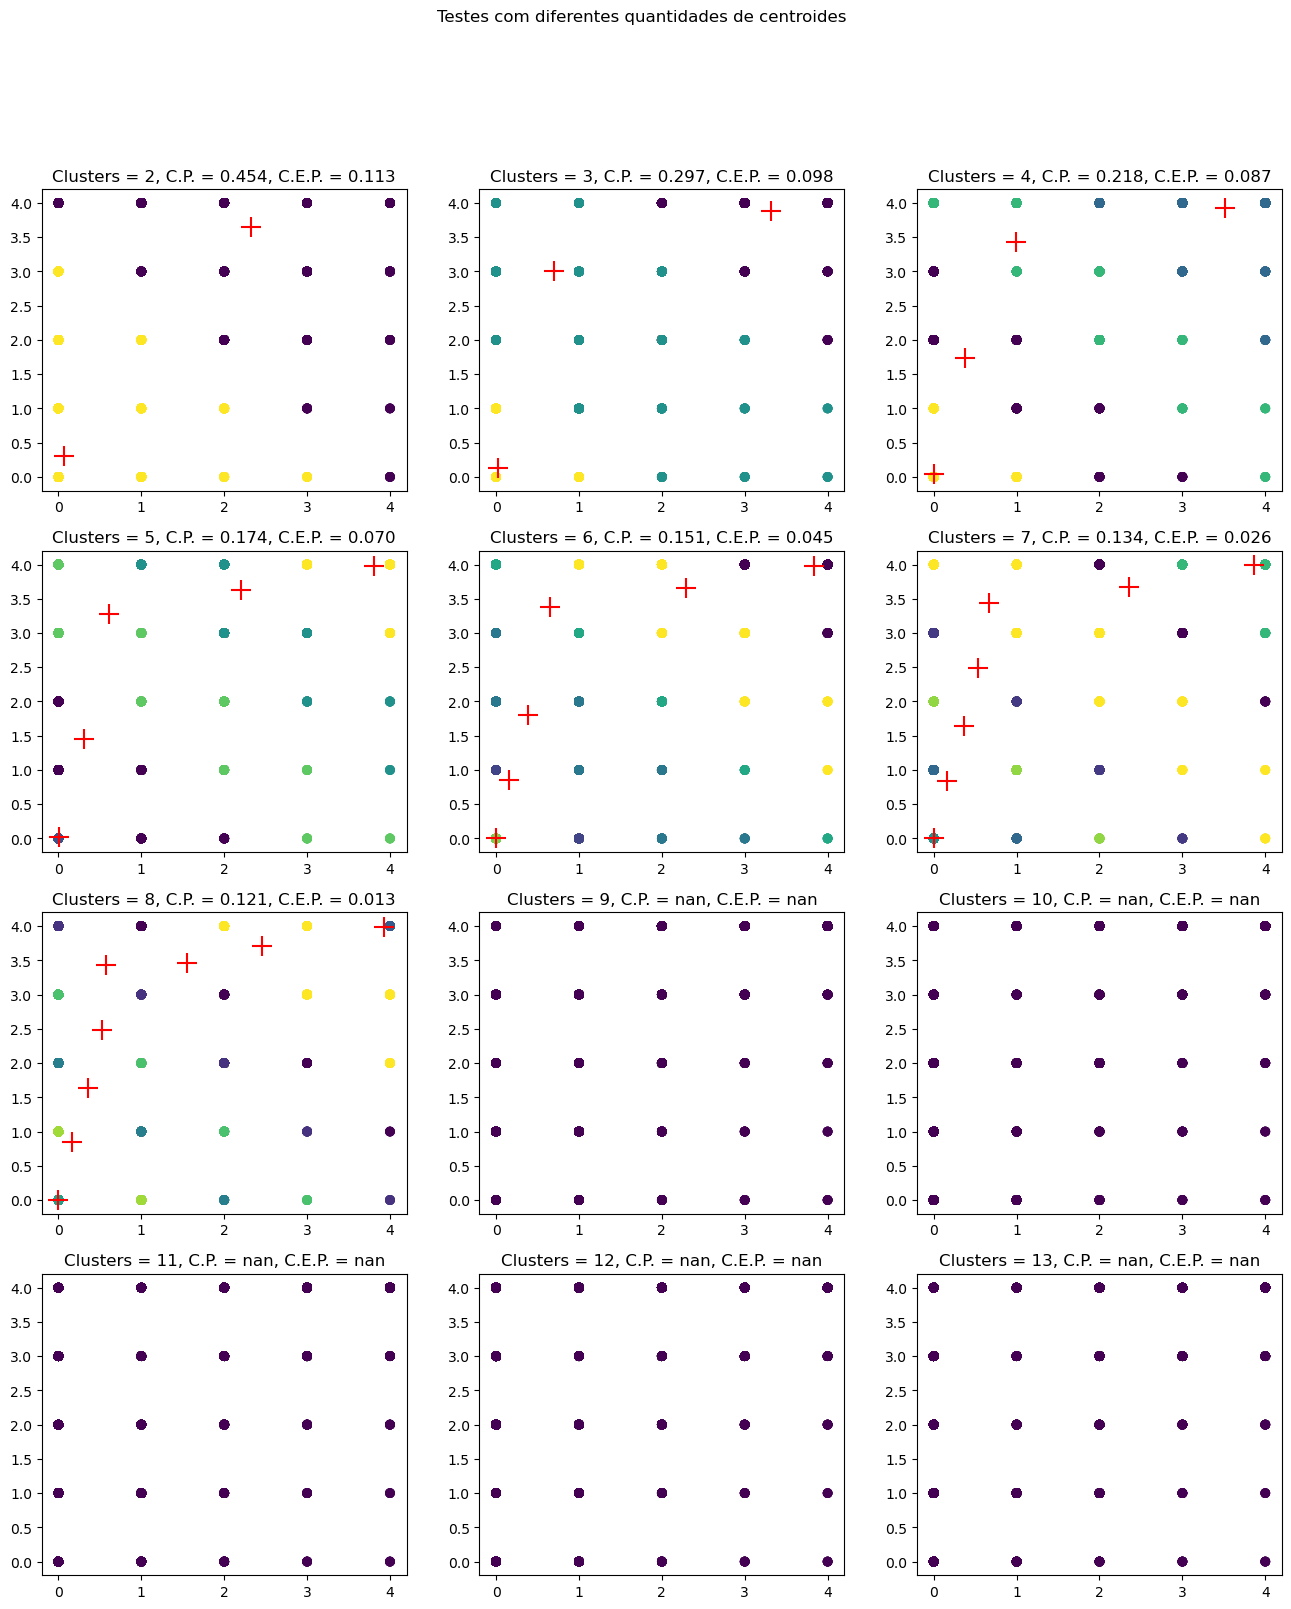

In [6]:
modelos = []

for qtd_clusters in lista_qtd_clusters:
    fcmeans = FCM(n_clusters = qtd_clusters,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = 2.0,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
nro_clusters = len(lista_qtd_clusters)
linhas = int(np.ceil(np.sqrt(nro_clusters)))
colunas = int(np.ceil(nro_clusters / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (16, 18))

for n_clusters, modelo, eixo in zip(lista_qtd_clusters, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"Clusters = {n_clusters}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

No gráfico acima o melhor resultado é o de 2 centroides, com C.P. = 0.454 e C.E.P. = 0.113. No entanto, a partir de 9 centróides ocorre erro de divisão, o que impede a impressão dos resultados com outras quantidades de núcleos.

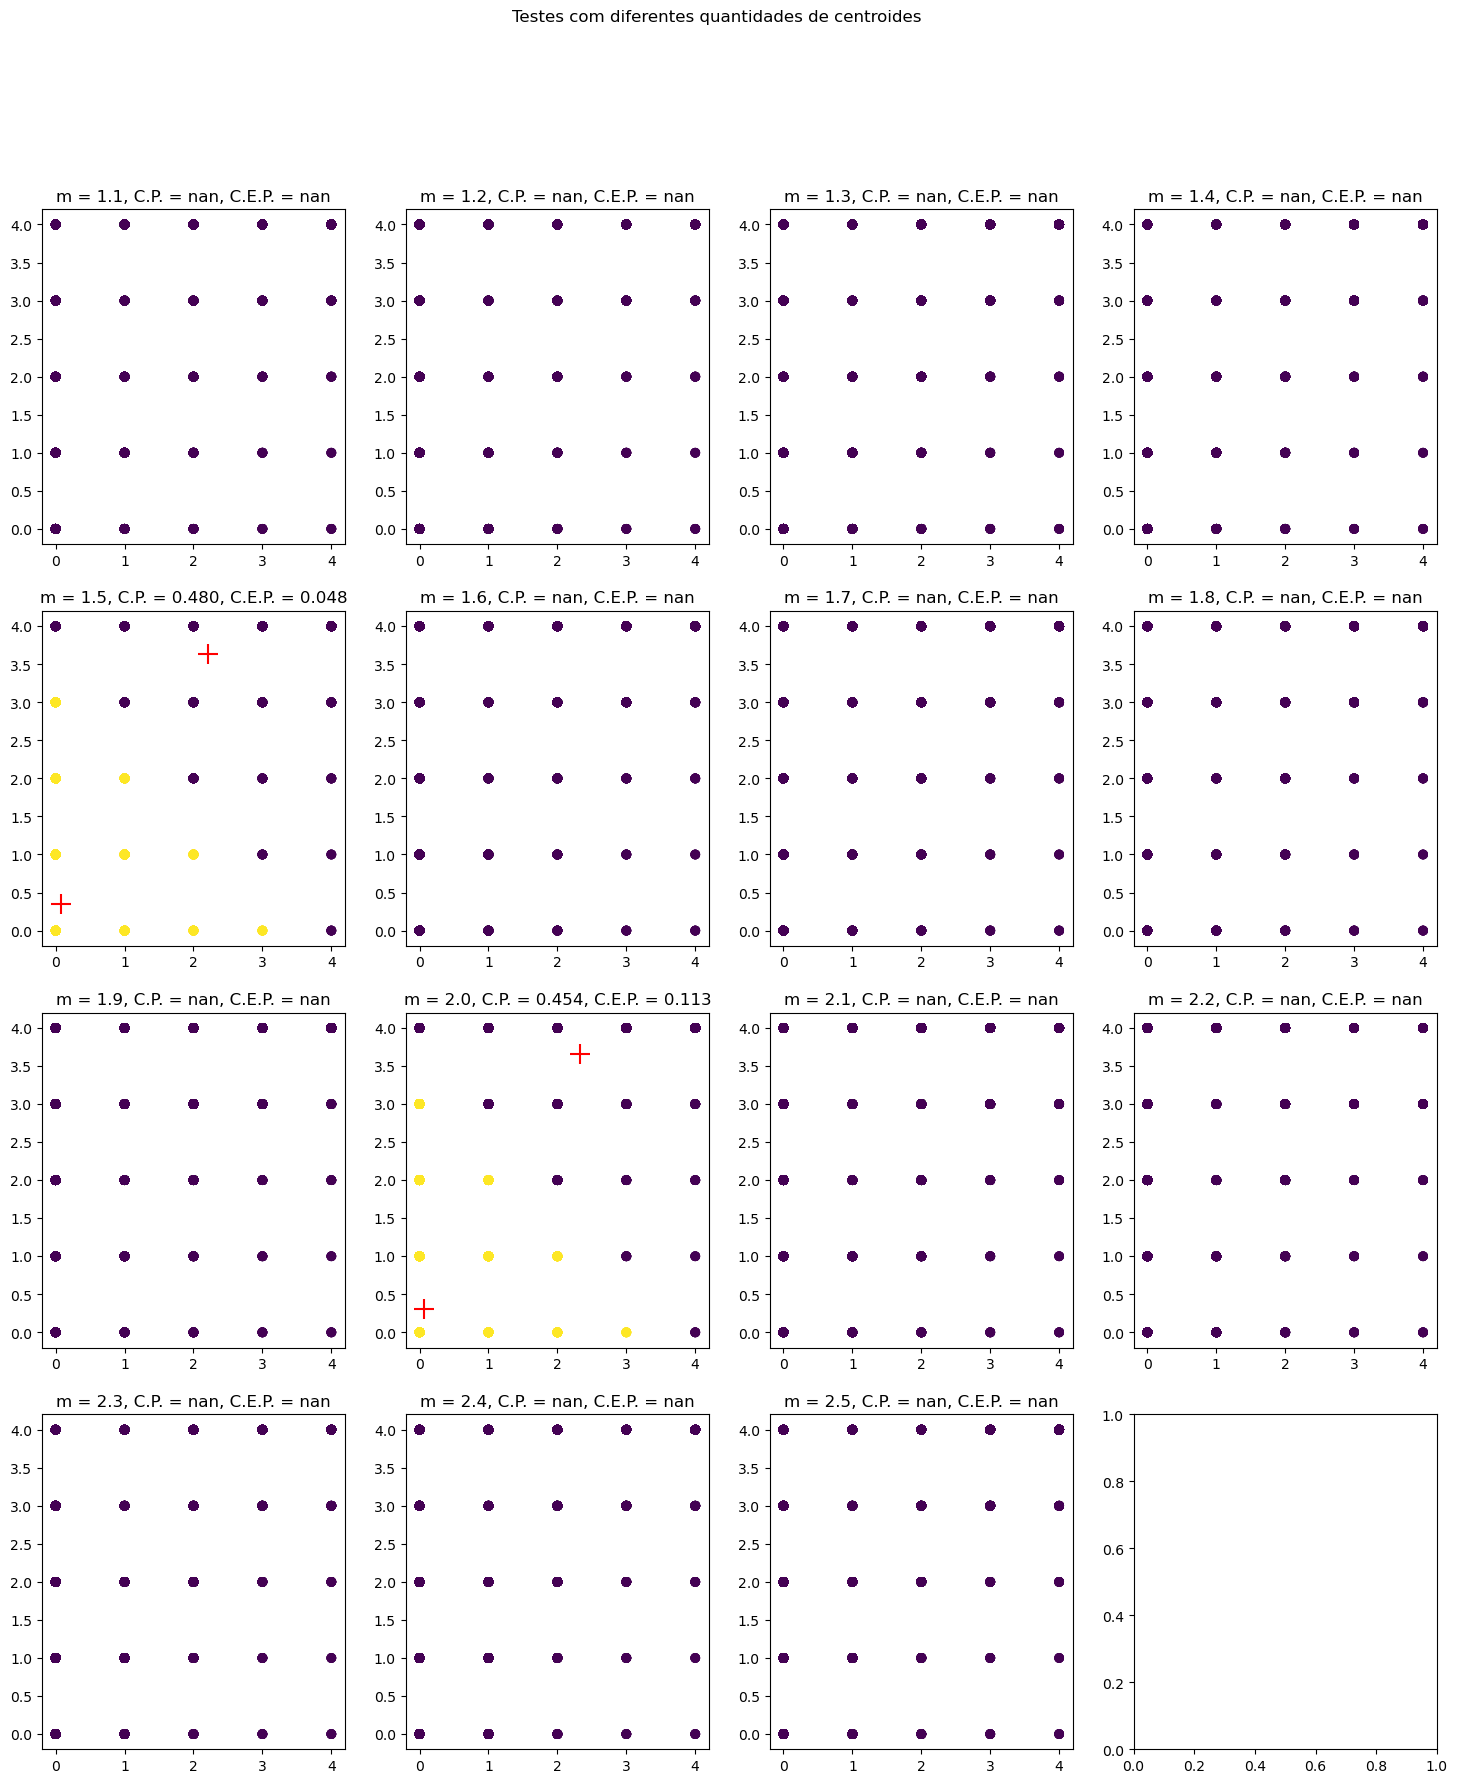

In [24]:
lista_parametros_fuzzy = [round(i, 1) for i in np.arange(1.1, 2.6, 0.1)]
modelos = []

for parametro_fuzzy in lista_parametros_fuzzy:
    fcmeans = FCM(n_clusters = 2,
                  random_state = 42,
                  max_iter = 500,
                  distance = "minkowski",
                  m = parametro_fuzzy,
                  distance_params = {"p": 1.0})
    fcmeans.fit(df_funcao_renal.values)
    modelos.append(fcmeans)
    
qtd_parametro_fuzzy = len(lista_parametros_fuzzy)
linhas = int(np.ceil(np.sqrt(qtd_parametro_fuzzy)))
colunas = int(np.ceil(qtd_parametro_fuzzy / linhas))

figura, eixos = plt.subplots(linhas, colunas, figsize = (18, 20))

for parametro_fuzzy, modelo, eixo in zip(lista_parametros_fuzzy, modelos, eixos.ravel()):
    coeficiente_particionamento = modelo.partition_coefficient
    coeficiente_entropia = modelo.partition_entropy_coefficient
    
    centroides = modelo.centers
    y_fcmeans = modelo.predict(df_funcao_renal.values)
    
    eixo.scatter(df_funcao_renal.values[:,0], df_funcao_renal.values[:,1], c = y_fcmeans, alpha = 0.9)
    eixo.scatter(centroides[:,0], centroides[:,1], marker = "+", s = 200, c = "r")
    eixo.set_title(f"m = {parametro_fuzzy}, C.P. = {coeficiente_particionamento:.3f}, C.E.P. = {coeficiente_entropia:.3f}")
    
plt.suptitle("Testes com diferentes quantidades de centroides")
plt.show()

Como podemos vez acima, o melhor parâmetro fuzzy é `m = 1.5`, com com C.P. = 0.480 e C.E.P. = 0.048.